In [58]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [59]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [60]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools




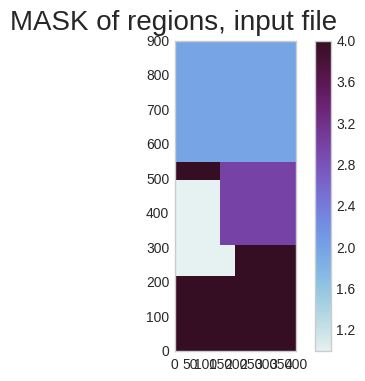

In [61]:
mask = np.zeros([40,898,398])
mask[:] = 4
for y in range(0,898):
    for x in range(0,398):
        #jdf
        if  (x <200) & (y>220) & (y<500) :
            mask[:,y,x] = 1
            #nsog
        if  (y >= 550) :
            mask[:,y,x] = 2
            # s sog
        if (x> 150) & (y>310) & (y<550) :
            mask[:,y,x] = 3

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(mask[0,:,:], cmap=cm.cm.dense)
fig.colorbar(mesh)
plt.suptitle('MASK of regions, input file',fontsize=20)


# Deep algorithm
#### Saturation horizon is below all supersaturated water....
    first_proper_undersat = np.min(t_indar[t_indar>max_supsat])
    Saturation horizon is below all supersaturated water....

In [62]:
OmA_deepAlg = { 'PI': {'JdF': 'value_1', 'N. Sog': 'value_1', 'S. Sog': 'value_1', 'Haro': 'value_1'},
                'BR': {'JdF': 'value_1', 'N. Sog': 'value_1', 'S. Sog': 'value_1', 'Haro': 'value_1'}}

Oma_hor_deep = nc.Dataset('../BASE_RUN/CLEAN/OmA/OmA_horizon_DEEPALG_05sep19.nc')

OmArHORIZON_pi_deepalg =  Oma_hor_deep['model_output']['OmArHORIZON_pi'][90,:,:]
OmArHORIZON_br_deepalg =  Oma_hor_deep['model_output']['OmArHORIZON_br'][90,:,:]

OmA_h_janfeb_pi_deepalg =  np.array(Oma_hor_deep['model_output']['OmArHORIZON_pi'][0:60,:,:])
OmA_h_dec_pi_deepalg =  np.array(Oma_hor_deep['model_output']['OmArHORIZON_pi'][364-60:-1,:,:])
OmA_h_winter_pi_deepalg =  np.concatenate([OmA_h_janfeb_pi_deepalg,OmA_h_dec_pi_deepalg])

OmA_h_janfeb_br_deepalg =  np.array(Oma_hor_deep['model_output']['OmArHORIZON_br'][0:60,:,:])
OmA_h_dec_br_deepalg =  np.array(Oma_hor_deep['model_output']['OmArHORIZON_br'][364-60:-1,:,:])
OmA_h_winter_br_deepalg =  np.concatenate([OmA_h_janfeb_br_deepalg,OmA_h_dec_br_deepalg])

#midmay to sept 1 
OmA_h_summer_pi_deepalg =  np.array(Oma_hor_deep['model_output']['OmArHORIZON_pi'][134:243,:,:])
OmA_h_summer_br_deepalg =  np.array(Oma_hor_deep['model_output']['OmArHORIZON_br'][134:243,:,:])

OmA_h_winter_mean_br_deepalg =  np.nanmean(OmA_h_winter_br_deepalg,axis = 0)
OmA_h_winter_mean_pi_deepalg =  np.nanmean(OmA_h_winter_pi_deepalg,axis = 0)
OmA_h_summer_mean_br_deepalg =  np.nanmean(OmA_h_summer_br_deepalg,axis = 0)
OmA_h_summer_mean_pi_deepalg =  np.nanmean(OmA_h_summer_pi_deepalg,axis = 0)

print(np.shape(OmA_h_winter_mean_br_deepalg))
print(np.shape(OmA_h_winter_mean_br_deepalg))



#

OmA_deepAlg_summer = { 'PI': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                'BR': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0}}
OmA_deepAlg_winter = { 'PI': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                'BR': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0}}


reg = ['JdF','N. Sog','S. Sog','Haro']
for i in range(1,5):
    
    surf_mask = mask[0,:,:]
    
    reg_mask = np.where(surf_mask == i)
    print('')
    print(reg[i-1])
    
    summer_shoal = (OmA_h_summer_mean_pi_deepalg - OmA_h_summer_mean_br_deepalg)
    print('average summer sat. hor. (PI): ', np.nanmean(OmA_h_summer_mean_pi_deepalg[reg_mask]))
    OmA_deepAlg_summer['PI'][reg[i-1]] = np.nanmean(OmA_h_summer_mean_pi_deepalg[reg_mask])
    print('average summer sat. hor (BR): ', np.nanmean(OmA_h_summer_mean_br_deepalg[reg_mask]))
    OmA_deepAlg_summer['BR'][reg[i-1]] = np.nanmean(OmA_h_summer_mean_br_deepalg[reg_mask])
    print('PI-BR shoaling summer: ', np.nanmean(summer_shoal[reg_mask]))
    
    winter_shoal = (OmA_h_winter_mean_pi_deepalg - OmA_h_winter_mean_br_deepalg)
    print('average winter sat. hor. (PI): ', np.nanmean(OmA_h_winter_mean_pi_deepalg[reg_mask]))
    OmA_deepAlg_winter['PI'][reg[i-1]] = np.nanmean(OmA_h_winter_mean_pi_deepalg[reg_mask])
    print('average winter sat. hor (BR): ', np.nanmean(OmA_h_winter_mean_br_deepalg[reg_mask]))
    OmA_deepAlg_winter['BR'][reg[i-1]] = np.nanmean(OmA_h_winter_mean_br_deepalg[reg_mask])
    print('PI-BR shoaling winter: ', np.nanmean(winter_shoal[reg_mask]))
    

#

(898, 398)
(898, 398)

JdF
average summer sat. hor. (PI):  44.381153
average summer sat. hor (BR):  43.001675
PI-BR shoaling summer:  1.3794892
average winter sat. hor. (PI):  94.32767
average winter sat. hor (BR):  91.040474
PI-BR shoaling winter:  3.1999712

N. Sog
average summer sat. hor. (PI):  42.121277
average summer sat. hor (BR):  33.20247
PI-BR shoaling summer:  8.934362
average winter sat. hor. (PI):  41.70193
average winter sat. hor (BR):  23.030369
PI-BR shoaling winter:  18.672728

S. Sog
average summer sat. hor. (PI):  51.775513
average summer sat. hor (BR):  40.93325
PI-BR shoaling summer:  10.856963
average winter sat. hor. (PI):  56.445633
average winter sat. hor (BR):  27.229723
PI-BR shoaling winter:  29.14051

Haro
average summer sat. hor. (PI):  62.587563
average summer sat. hor (BR):  59.503185
PI-BR shoaling summer:  3.0871873
average winter sat. hor. (PI):  66.82174
average winter sat. hor (BR):  64.76793
PI-BR shoaling winter:  2.053721


In [63]:
Oma_hor_shal = nc.Dataset('../BASE_RUN/CLEAN/OmA/OmA_horizon_SHALLOWALG_05sep19.nc')

OmArHORIZON_pi_shallowalg =  Oma_hor_shal['model_output']['OmArHORIZON_pi'][90,:,:]
OmArHORIZON_br_shallowalg =  Oma_hor_shal['model_output']['OmArHORIZON_br'][90,:,:]

OmA_h_janfeb_pi_shallowalg =  np.array(Oma_hor_shal['model_output']['OmArHORIZON_pi'][0:60,:,:])
OmA_h_dec_pi_shallowalg =  np.array(Oma_hor_shal['model_output']['OmArHORIZON_pi'][364-60:-1,:,:])
OmA_h_winter_pi_shallowalg =  np.concatenate([OmA_h_janfeb_pi_shallowalg,OmA_h_dec_pi_shallowalg])

OmA_h_janfeb_br_shallowalg =  np.array(Oma_hor_shal['model_output']['OmArHORIZON_br'][0:60,:,:])
OmA_h_dec_br_shallowalg =  np.array(Oma_hor_shal['model_output']['OmArHORIZON_br'][364-60:-1,:,:])
OmA_h_winter_br_shallowalg =  np.concatenate([OmA_h_janfeb_br_shallowalg,OmA_h_dec_br_shallowalg])

#midmay to sept 1 
OmA_h_summer_pi_shallowalg =  np.array(Oma_hor_shal['model_output']['OmArHORIZON_pi'][134:243,:,:])
OmA_h_summer_br_shallowalg =  np.array(Oma_hor_shal['model_output']['OmArHORIZON_br'][134:243,:,:])

OmA_h_winter_mean_br_shallowalg =  np.nanmean(OmA_h_winter_br_shallowalg,axis = 0)
OmA_h_winter_mean_pi_shallowalg =  np.nanmean(OmA_h_winter_pi_shallowalg,axis = 0)
OmA_h_summer_mean_br_shallowalg =  np.nanmean(OmA_h_summer_br_shallowalg,axis = 0)
OmA_h_summer_mean_pi_shallowalg =  np.nanmean(OmA_h_summer_pi_shallowalg,axis = 0)

print(np.shape(OmA_h_winter_mean_br_shallowalg))
print(np.shape(OmA_h_winter_mean_br_shallowalg))

OmA_shalAlg_summer = { 'PI': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                'BR': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0}}
OmA_shalAlg_winter = { 'PI': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                'BR': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0}}


reg = ['JdF','N. Sog','S. Sog','Haro']
for i in range(1,5):
    
    surf_mask = mask[0,:,:]
    
    reg_mask = np.where(surf_mask == i)
    print('')
    print(reg[i-1])
    
    summer_shoal = (OmA_h_summer_mean_pi_shallowalg - OmA_h_summer_mean_br_shallowalg)
    print('average summer sat. hor. (PI): ', np.nanmean(OmA_h_summer_mean_pi_shallowalg[reg_mask]))
    OmA_shalAlg_summer['PI'][reg[i-1]] = np.nanmean(OmA_h_summer_mean_pi_shallowalg[reg_mask])
    print('average summer sat. hor (BR): ', np.nanmean(OmA_h_summer_mean_br_shallowalg[reg_mask]))
    OmA_shalAlg_summer['BR'][reg[i-1]] = np.nanmean(OmA_h_summer_mean_br_shallowalg[reg_mask])
    print('PI-BR shoaling summer: ', np.nanmean(summer_shoal[reg_mask]))
    
    winter_shoal = (OmA_h_winter_mean_pi_shallowalg - OmA_h_winter_mean_br_shallowalg)
    print('average winter sat. hor. (PI): ', np.nanmean(OmA_h_winter_mean_pi_shallowalg[reg_mask]))
    OmA_shalAlg_winter['PI'][reg[i-1]] = np.nanmean(OmA_h_winter_mean_pi_shallowalg[reg_mask])
    print('average winter sat. hor (BR): ', np.nanmean(OmA_h_winter_mean_br_shallowalg[reg_mask]))
    OmA_shalAlg_winter['BR'][reg[i-1]] = np.nanmean(OmA_h_winter_mean_br_shallowalg[reg_mask])
    print('PI-BR shoaling winter: ', np.nanmean(winter_shoal[reg_mask]))
    

(898, 398)
(898, 398)

JdF
average summer sat. hor. (PI):  44.311565
average summer sat. hor (BR):  42.93213
PI-BR shoaling summer:  1.3794421
average winter sat. hor. (PI):  93.088356
average winter sat. hor (BR):  89.82854
PI-BR shoaling winter:  3.2598152

N. Sog
average summer sat. hor. (PI):  41.55981
average summer sat. hor (BR):  32.642406
PI-BR shoaling summer:  8.917407
average winter sat. hor. (PI):  40.703556
average winter sat. hor (BR):  20.453995
PI-BR shoaling winter:  20.249561

S. Sog
average summer sat. hor. (PI):  49.365505
average summer sat. hor (BR):  38.979248
PI-BR shoaling summer:  10.386261
average winter sat. hor. (PI):  47.443653
average winter sat. hor (BR):  23.042753
PI-BR shoaling winter:  24.4009

Haro
average summer sat. hor. (PI):  62.57987
average summer sat. hor (BR):  59.490246
PI-BR shoaling summer:  3.0896204
average winter sat. hor. (PI):  64.888504
average winter sat. hor (BR):  60.541656
PI-BR shoaling winter:  4.34684


## put this in bar-plot form...

In [64]:

means_shall_summer_BR = np.zeros(4)
means_deep_summer_BR = np.zeros(4)
for i in range(0,4):
    means_shall_summer_BR[i] = OmA_shalAlg_summer['BR'][reg[i]]
    means_deep_summer_BR[i] = OmA_deepAlg_summer['BR'][reg[i]]
    
means_shall_winter_BR = np.zeros(4)
means_deep_winter_BR = np.zeros(4)
for i in range(0,4):
    means_shall_winter_BR[i] = OmA_shalAlg_winter['BR'][reg[i]]
    means_deep_winter_BR[i] = OmA_deepAlg_winter['BR'][reg[i]]
    
means_shall_summer_PI = np.zeros(4)
means_deep_summer_PI = np.zeros(4)

for i in range(0,4):
    means_shall_summer_PI[i] = OmA_shalAlg_summer['PI'][reg[i]]
    means_deep_summer_PI[i] = OmA_deepAlg_summer['PI'][reg[i]]
    
means_shall_winter_PI = np.zeros(4)
means_deep_winter_PI = np.zeros(4)
for i in range(0,4):
    means_shall_winter_PI[i] = OmA_shalAlg_winter['PI'][reg[i]]
    means_deep_winter_PI[i] = OmA_deepAlg_winter['PI'][reg[i]]
 
print('JdF','N. Sog','S. Sog','Haro')  
print('means_shall_summer_BR')
print(means_shall_summer_BR)
print('means_deep_summer_BR')
print(means_deep_summer_BR)
print('means_shall_winter_BR')
print(means_shall_winter_BR)
print('means_deep_winter_BR')
print(means_deep_winter_BR)
print('')
print('means_shall_summer_PI')
print(means_shall_summer_PI)
print('means_deep_summer_PI')
print(means_deep_summer_PI)
print('means_shall_winter_PI')
print(means_shall_winter_PI)
print('means_deep_winter_PI')
print(means_deep_winter_PI)

JdF N. Sog S. Sog Haro
means_shall_summer_BR
[42.93212891 32.64240646 38.97924805 59.49024582]
means_deep_summer_BR
[43.00167465 33.20246887 40.93325043 59.50318527]
means_shall_winter_BR
[89.82853699 20.45399475 23.04275322 60.54165649]
means_deep_winter_BR
[91.04047394 23.0303688  27.22972298 64.76792908]

means_shall_summer_PI
[44.3115654  41.55981064 49.36550522 62.57986832]
means_deep_summer_PI
[44.38115311 42.12127686 51.7755127  62.58756256]
means_shall_winter_PI
[93.08835602 40.70355606 47.44365311 64.88850403]
means_deep_winter_PI
[94.32766724 41.701931   56.44563293 66.8217392 ]


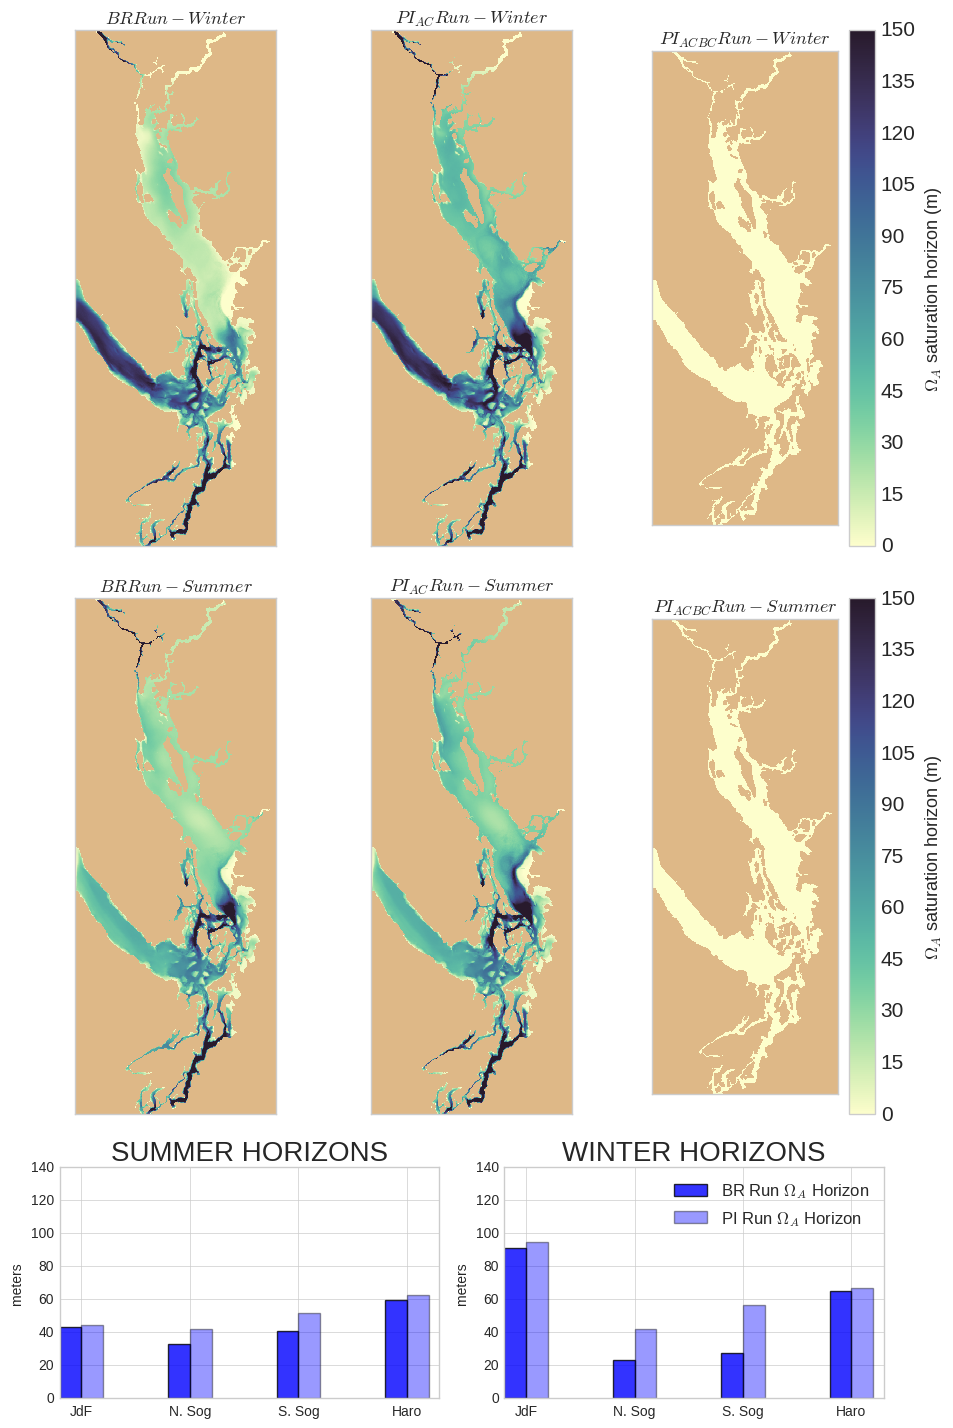

In [68]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import cmocean as cm

fact = 1.2
fig =plt.figure(figsize=(8*fact,12*fact))
gs=GridSpec(5,6) # 3 rows, 3 columns
axtitsiz = 13

##WINTER
ax1=fig.add_subplot(gs[0:2,0:2]) # First row, first column
cmap = cm.cm.deep
tplt = OmA_h_winter_mean_br_deepalg
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=150)
viz_tools.plot_land_mask(ax1, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
ax1.set_title('$BR  Run - Winter$', fontsize = axtitsiz)
plt.xticks([])
plt.yticks([])

ax2=fig.add_subplot(gs[0:2,2:4]) # First row, second column
cmap = cm.cm.deep
tplt = OmA_h_winter_mean_pi_deepalg
viz_tools.set_aspect(ax2)
mesh = ax2.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=150)
viz_tools.plot_land_mask(ax2, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
ax2.set_title('$PI_{AC}  Run - Winter$', fontsize = axtitsiz)
plt.xticks([])
plt.yticks([])

ax3=fig.add_subplot(gs[0:2,4:6]) # First row, third column
cmap = cm.cm.deep
tplt3 = np.copy(OmA_h_winter_mean_pi_deepalg)
tplt3[:] = 0
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt3, cmap=cm.cm.deep, vmin=0, vmax=150)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = axtitsiz)
ax3.set_title('$PI_{ACBC}  Run - Winter$', fontsize = axtitsiz)
plt.xticks([])
plt.yticks([])

##SUMMER
ax4=fig.add_subplot(gs[2:4,0:2]) # First row, first column
cmap = cm.cm.deep
tplt = OmA_h_summer_mean_br_deepalg
viz_tools.set_aspect(ax4)
mesh = ax4.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=150)
viz_tools.plot_land_mask(ax4, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
ax4.set_title('$BR  Run - Summer$', fontsize = axtitsiz)
plt.xticks([])
plt.yticks([])

ax5=fig.add_subplot(gs[2:4,2:4]) # First row, second column
cmap = cm.cm.deep
tplt = OmA_h_summer_mean_pi_deepalg
viz_tools.set_aspect(ax5)
mesh = ax5.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=150)
viz_tools.plot_land_mask(ax5, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
ax5.set_title('$PI_{AC}  Run - Summer$', fontsize = axtitsiz)
plt.xticks([])
plt.yticks([])

ax6=fig.add_subplot(gs[2:4,4:6]) # First row, third column
cmap = cm.cm.deep
tplt3 = np.copy(OmA_h_winter_mean_pi_deepalg)
tplt3[:] = 0
viz_tools.set_aspect(ax6)
mesh = ax6.pcolormesh(tplt3, cmap=cm.cm.deep, vmin=0, vmax=150)
viz_tools.plot_land_mask(ax6, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = axtitsiz)
ax6.set_title('$PI_{ACBC}  Run - Summer$', fontsize = axtitsiz)
plt.xticks([])
plt.yticks([])

ax=fig.add_subplot(gs[4,0:3]) # Second row, span all columns
index = np.arange(4)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index+0.0, means_deep_summer_BR, bar_width,
alpha=opacity,
color='b',
label='BR Run $\Omega_A$ Horizon')
rects1 = plt.bar(index+0.2, means_deep_summer_PI, bar_width,
alpha=opacity/2,
color='b',
label='PI Run $\Omega_A$ Horizon')

plt.ylim([0,140])
plt.xticks(index + bar_width, (reg[0], reg[1], reg[2], reg[3]))
ax.set_title('SUMMER HORIZONS', fontsize = 20)
ax.set_ylabel('meters')

ax=fig.add_subplot(gs[4,3:6])
index = np.arange(4)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index+0.0, means_deep_winter_BR, bar_width,
alpha=opacity,
color='b',
label='BR Run $\Omega_A$ Horizon')
rects1 = plt.bar(index+0.2, means_deep_winter_PI, bar_width,
alpha=opacity/2,
color='b',
label='PI Run $\Omega_A$ Horizon')
plt.legend(loc='best')
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))

plt.ylim([0,140])
plt.xticks(index + bar_width, (reg[0], reg[1], reg[2], reg[3]))
ax.set_title('WINTER HORIZONS', fontsize = 20)
ax.set_ylabel('meters')
#plt.suptitle('$\Omega_A$ saturation horizon depth for 3 run cases', fontsize = 15)

plt.tight_layout()
plt.show()
#fig.savefig('gridspec.png')